In [48]:
using StableSpectralElements, Plots, LaTeXStrings

In [49]:
p = [i for i in 2:15]

function N_flux(nz_S, nz_C)
    return [0.5*sum(nz_S[m][i] for m in 1:length(nz_S)) + nz_C[i] for i in eachindex(nz_C)]
end

nz_S_tensor = (zeros(14), zeros(14))
nz_C_tensor = zeros(14)

tol=1e-16
for i in eachindex(p)
    approx_type = ModalTensor(p[i])
    ref_approx = ReferenceApproximation(approx_type, Tri())
    D_ξ = reference_derivative_operators(ref_approx.D, ref_approx.reference_mapping)
    S, C = flux_differencing_operators(approx_type, D_ξ, ref_approx.W, 
        ref_approx.R, ref_approx.B)
    nz_S_tensor[1][i] = count(x->abs(x)>tol, Matrix(S[1]))
    nz_S_tensor[2][i] = count(x->abs(x)>tol, Matrix(S[2]))
    nz_C_tensor[i] = count(x->abs(x)>tol, Matrix(C))
end

In [50]:
nz_S_multi = (zeros(14), zeros(14))
nz_C_multi = zeros(14)
for i in eachindex(p)
    approx_type = ModalMulti(p[i])
    ref_approx = ReferenceApproximation(approx_type, Tri())
    D_ξ = reference_derivative_operators(ref_approx.D, ref_approx.reference_mapping)
    S, C = flux_differencing_operators(approx_type, D_ξ, ref_approx.W, 
        ref_approx.R, ref_approx.B)
    nz_S_multi[1][i] = length(S[1])-size(S[1],1)
    nz_S_multi[2][i] =  length(S[2])-size(S[2],1)
    nz_C_multi[i] = length(C)
end

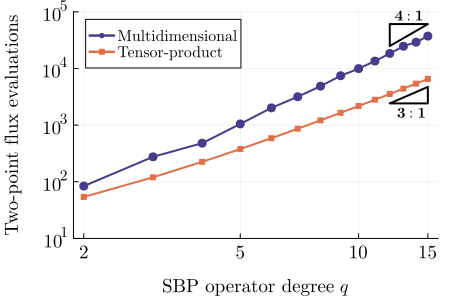

In [51]:
plt = plot(legend=:topleft, xlabel="\nSBP operator degree \$q\$", 
    xscale=:log10, 
    yscale=:log10, 
    ylims=[10,10^5], 
    #xlims=[1,16], ylims=[1,6],
    ylabel="Two-point flux evaluations\n", fontfamily="Computer Modern", legendfontsize=10,
    xguidefontsize=12, yguidefontsize=12, xtickfontsize=12, ytickfontsize=12,
    xticks=([2,5,10,15], string.([2,5,10,15])), size=(450,300))
plot!(plt, p, N_flux(nz_S_multi,nz_C_multi), label="Multidimensional", 
    linestyle=:solid, markershape=:circle, markersize=5, linewidth=2, 
    markerstrokewidth=0.0, color=:slateblue4)
plot!(plt, p, N_flux(nz_S_tensor,nz_C_tensor), label="Tensor-product", 
    linestyle=:solid, markershape=:square, markersize=3, linewidth=2, 
    markerstrokewidth=0.0, color=2)
r1 = 12
r2 = 15
plot!(plt, [r1, r2, r2, r1], 1.4*[r1^3, r2^3, r1^3, r1^3], label=:none, 
    linewidth=2, color=:black, annotations = ([13.7], [1.65*10^3], L"\mathbf{3:1}", 10))

plot!(plt, [r1, r1, r2, r1], 1.2*[r1^4, r2^4, r2^4, r1^4], label=:none, 
    linewidth=2, color=:black, annotations = ([13.5], [8.6*10^4], L"\mathbf{4:1}", 10))

In [52]:
savefig(plt, "../plots/euler_num_fluxes_tri.pdf")

"/Users/tristanmontoya/Research/ReproduceEntropyStableDSEM/plots/euler_num_fluxes_tri.pdf"

In [53]:
hcat(p, N_flux(nz_S_multi,nz_C_multi) ./ N_flux(nz_S_tensor,nz_C_tensor))

14×2 Matrix{Float64}:
  2.0  1.55556
  3.0  2.3
  4.0  2.13333
  5.0  2.77778
  6.0  3.42857
  7.0  3.67361
  8.0  4.00988
  9.0  4.51273
 10.0  4.56612
 11.0  4.80769
 12.0  5.18681
 13.0  5.60136
 14.0  5.38889
 15.0  5.71048